
# ML Data Cleaning and Feature Selection
In this assignment, you will use a dataset for predictive learning and check the quality of the data and determine which features are important.

In [1]:
#Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np

Import the data set

In [2]:
df = pd.read_csv("Employee.csv")

In [3]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


# 1) What are the data types? (Only numeric and categorical)




In [4]:
#Check for Datatypes
df.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

**Ans.**
Categorical:- Education, City, Gender, EverBenched, LeaveOrNot                  
Numeric:- JoiningYear, PaymentTier,  Age, ExperienceInCurrentDomain

# 2) Are there any missing values?

In [5]:
#Check for missing/null values
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

**Ans.**
There are 0 null values in the Dataset

# 3) What are the likely distributions of the numeric variables?



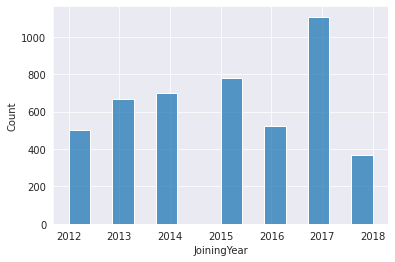

In [6]:
# Plot for JoiningYear to check the distirbution
sns.set_style('darkgrid')
sns.histplot(df.JoiningYear); 

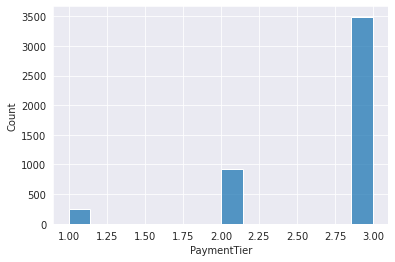

In [7]:
# Plot for PaymentTier to check the distirbution
sns.set_style('darkgrid')
sns.histplot(df.PaymentTier); 

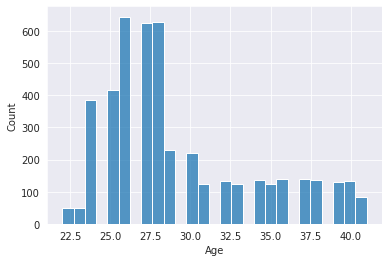

In [8]:
# Plot for Age to check the distirbution
sns.set_style('darkgrid')
sns.histplot(df.Age); 

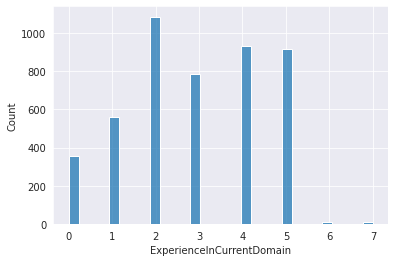

In [9]:
# Plot for ExperienceInCurrentDomain to check the distirbution
sns.set_style('darkgrid')
sns.histplot(df.ExperienceInCurrentDomain); 

In [10]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


# 4) * Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

In [11]:
df = pd.read_csv("Employee.csv")
# get the dummies and store it in a variable
dummies = pd.get_dummies(data=df, columns=['Education', 'Gender','EverBenched'])
 
# Concatenate the dummies to original dataframe
useful_feature = pd.concat([df, dummies],  axis=1)
# merged.drop(['Gender'], axis=1, inplace=True)

# drop the values
useful_feature.drop(['Education', 'City', 'Gender' , 'EverBenched'], axis='columns', inplace=True)

# drop the duplicate columns
useful_feature = useful_feature.loc[:,~useful_feature.columns.duplicated()]

# print the data
print(useful_feature)

      JoiningYear  PaymentTier  Age  ExperienceInCurrentDomain  LeaveOrNot  \
0            2017            3   34                          0           0   
1            2013            1   28                          3           1   
2            2014            3   38                          2           0   
3            2016            3   27                          5           1   
4            2017            3   24                          2           1   
...           ...          ...  ...                        ...         ...   
4648         2013            3   26                          4           0   
4649         2013            2   37                          2           1   
4650         2018            3   27                          5           1   
4651         2012            3   30                          2           0   
4652         2015            3   33                          4           0   

      Education_Bachelors  Education_Masters  Education_PHD  Ge

**1. Method** :**Univariate Selection**


In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [13]:
X = useful_feature.iloc[:,0:8]  #independent columns
y = useful_feature.iloc[:,-1]    #target column i.e LeaveOrNot

In [14]:
#apply SelectKBest class to extract top 8 best features
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X,y)


In [15]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [16]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                       Specs      Score
4                 LeaveOrNot  18.783510
7              Education_PHD  14.352417
5        Education_Bachelors   1.603632
2                        Age   0.959721
6          Education_Masters   0.733508
1                PaymentTier   0.200486
0                JoiningYear   0.019525
3  ExperienceInCurrentDomain   0.007702


Ans. Using the 1st method Univariate we conclude that Education_PHD is the significant independent variable

2. Method :Feature Importance

In [17]:
X = useful_feature.iloc[:,0:10]  #independent columns
y = useful_feature.iloc[:,-1]    #target column i.e price range

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt


In [19]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.23739284 0.05490003 0.43679051 0.20360408 0.02837496 0.01036942
 0.00801134 0.00721142 0.00642717 0.00691821]


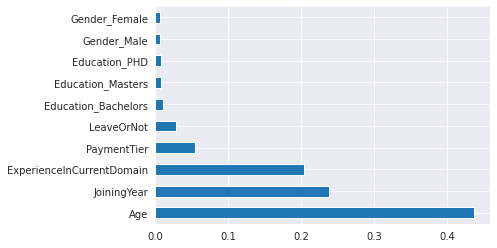

In [20]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Ans. Using the 2nd method Feature Importance we conclude that Education_PHD is the significant independent variable

3. Method :Correlation Matrix with Heatmap

In [21]:
X = useful_feature.iloc[:,0:20]  #independent columns
y = useful_feature.iloc[:,-1]    #target column i.e price range

In [22]:
#get correlations of each features in dataset
corrmat = useful_feature.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(70,70))

<Figure size 5040x5040 with 0 Axes>

<Figure size 5040x5040 with 0 Axes>

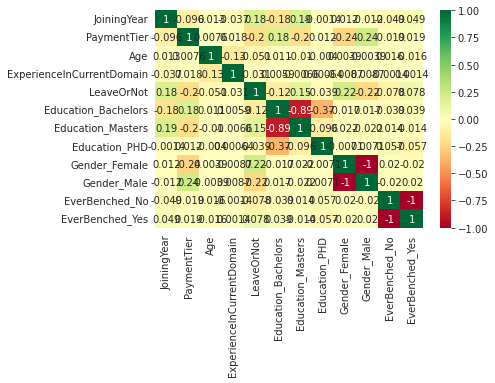

In [23]:
#plot heat map
g=sns.heatmap(useful_feature[top_corr_features].corr(),annot=True,cmap="RdYlGn")


Ans. Using the 3rd method Correlation Matrix with Heatmap we conclude that Education_PHD is the significant independent variable

# 5) Which independent variables have missing data? How much? 
Ans. There are no independent variables with missing Data

In [24]:
#Check for missing/null values
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

# 6) Do the training and test sets have the same data?

In [25]:
from sklearn.model_selection import train_test_split

X = df.drop("LeaveOrNot", axis = 1)
y = df["LeaveOrNot"]

# Create the X_train and y_train
X_train = df.drop("LeaveOrNot", axis = 1)
y_train = df["LeaveOrNot"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
X_train.shape, X_test.shape

((3722, 8), (931, 8))

In [26]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


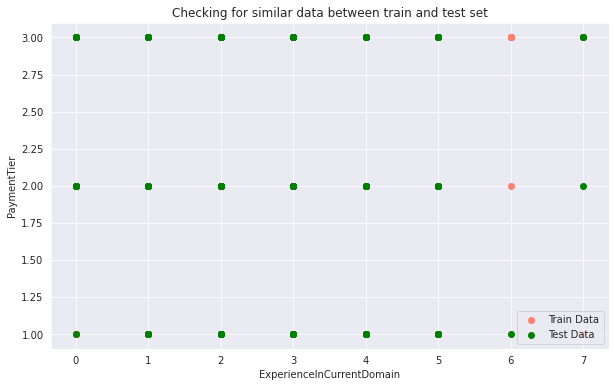

In [27]:
# Scatter plot between test and train data

# Create another figure 
plt.figure(figsize=(10, 6))

# Scatter with the postive examples
plt.scatter(X_train.ExperienceInCurrentDomain ,
            X_train.PaymentTier,
            c="salmon")

# Scatter with negative examples
plt.scatter(X_test.ExperienceInCurrentDomain,
            X_test.PaymentTier,
           c="green")

# Add some helpful info
plt.title("Checking for similar data between train and test set")
plt.xlabel("ExperienceInCurrentDomain")
plt.ylabel("PaymentTier")
plt.legend(["Train Data", "Test Data"]);

Ans. From the scatter plot we can see that the Train Data and Test Data are not similar

# 7) In the predictor variables independent of all the other predictor variables?

In [28]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [29]:
emp = df[['JoiningYear', 'PaymentTier', 'Age' ,'ExperienceInCurrentDomain']]
emp.head()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain
0,2017,3,34,0
1,2013,1,28,3
2,2014,3,38,2
3,2016,3,27,5
4,2017,3,24,2


In [30]:
emp.corr().style.background_gradient(cmap='coolwarm')

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain
JoiningYear,1.000000,-0.096078,0.013165,-0.036525
PaymentTier,-0.096078,1.000000,0.007631,0.018314
Age,0.013165,0.007631,1.000000,-0.134643
ExperienceInCurrentDomain,-0.036525,0.018314,-0.134643,1.000000


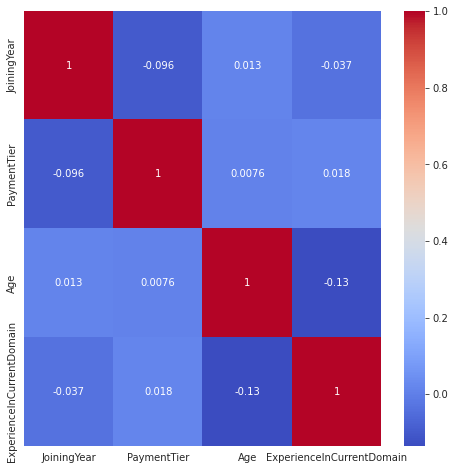

In [31]:
import seaborn
plt.figure(figsize=(8,8))
seaborn.heatmap(emp.corr(),annot = True, cmap="coolwarm")

Ans. We can say that the predicator variables are independent of all other variables

# 8) Which predictor variables are the most important?

In [32]:
#Logistic Regression Feature Importance
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

In [33]:
# define dataset
X = useful_feature.iloc[:,0:10]  #independent columns
y = useful_feature.iloc[:,-1]    #target column i.e price range


In [34]:
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
model.coef_

array([[-0.00151911,  0.14623829, -0.00824525,  0.00425223,  0.64626567,
         0.50975878,  0.34751033, -0.86206624, -0.13991572,  0.1351186 ]])

In [35]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(model.coef_[0])))
feature_dict

{'Age': 0.6462656659260894,
 'City': -0.008245249473393251,
 'Education': -0.0015191134140281792,
 'EverBenched': 0.34751033466831754,
 'ExperienceInCurrentDomain': -0.8620662356241884,
 'Gender': 0.5097587755301767,
 'JoiningYear': 0.14623828695278937,
 'LeaveOrNot': -0.13991572208175115,
 'PaymentTier': 0.00425223095866468}

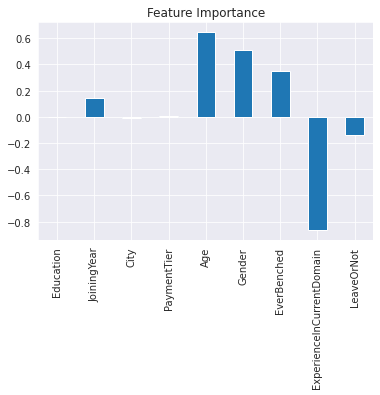

In [36]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

**Ans.** We can see that **Age, Gender, Joining Year** are the important features since they are close to the Positive Co-efficient.

# 9) Do the ranges of the predictor variables make sense?

**Ans.**
 Yes, We have found out that the predictor variable Age is a significant factor for LeaveOrNot. Age is connsidered a siginficant feature because more experience means more stability and greater the chanes of staying in the company.

# 10) What are the distributions of the predictor variables? 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


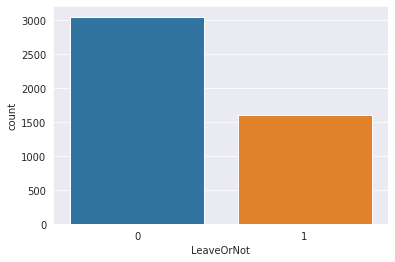

In [37]:
sns.set_style('darkgrid')
sns.countplot(df.LeaveOrNot); 

Ans. The above Countplot shows the distributions of Predictor Variables

# 11) Remove outliers and keep outliers (does it have an effect of the final predictive model)?

In [38]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split data into train and test sets
np.random.seed(42)
useful_feature

X = useful_feature
y = df["LeaveOrNot"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
# # # Fit an instance of LogisticRegression

clf = LogisticRegression(solver="liblinear")
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

Accuracy is 68% before removing outliers

In [40]:
def plot_boxplot(df,ft):
  df.boxplot(column=[ft])
  plt.grid(False)
  plt.show()

In [41]:
useful_feature.head()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Education_Bachelors,Education_Masters,Education_PHD,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes
0,2017,3,34,0,0,1,0,0,0,1,1,0
1,2013,1,28,3,1,1,0,0,1,0,1,0
2,2014,3,38,2,0,1,0,0,1,0,1,0
3,2016,3,27,5,1,0,1,0,0,1,1,0
4,2017,3,24,2,1,0,1,0,0,1,0,1


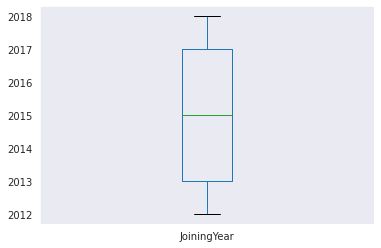

In [42]:
plot_boxplot(useful_feature,"JoiningYear")

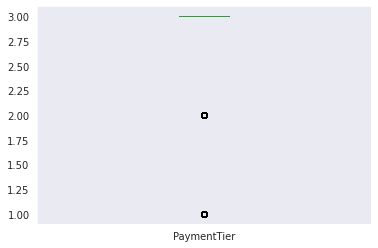

In [43]:
plot_boxplot(useful_feature,"PaymentTier")

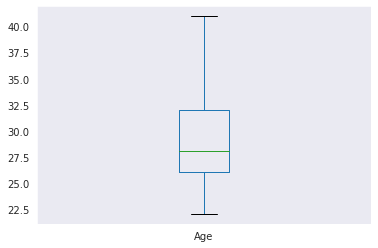

In [44]:
plot_boxplot(useful_feature,"Age")

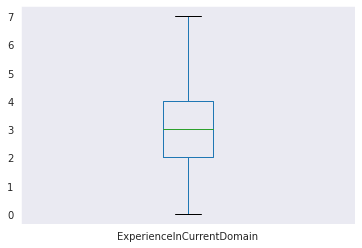

In [45]:
plot_boxplot(useful_feature,"ExperienceInCurrentDomain")

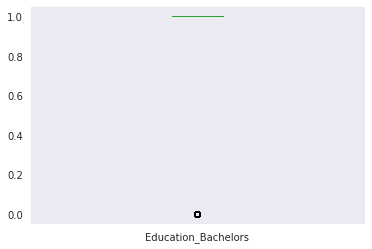

In [46]:
plot_boxplot(useful_feature,"Education_Bachelors")

In [47]:
#Remove Outliers
def outliers(useful_feature, ft):
  Q1 =  useful_feature[ft].quantile(0.25)
  Q3 =  useful_feature[ft].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  ls = useful_feature.index[(df[ft] < lower_bound) | (df[ft] < upper_bound)]

  return ls

In [48]:
index_list = []
for feature in ['PaymentTier']:
  index_list.extend(outliers(useful_feature, feature))

In [49]:
def remove(useful_feature,ls):
  ls = sorted(set(ls))
  useful_feature = useful_feature.drop(ls)
  return useful_feature

In [50]:
df_cleaned = remove(useful_feature, index_list)

In [51]:
df_cleaned.shape

(3492, 12)

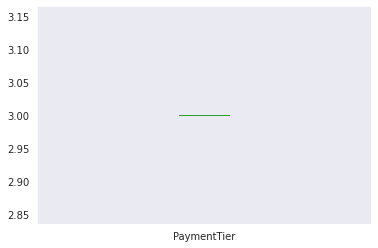

In [52]:
plot_boxplot(df_cleaned,'PaymentTier')

In [53]:
df_cleaned.head()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Education_Bachelors,Education_Masters,Education_PHD,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes
0,2017,3,34,0,0,1,0,0,0,1,1,0
2,2014,3,38,2,0,1,0,0,1,0,1,0
3,2016,3,27,5,1,0,1,0,0,1,1,0
4,2017,3,24,2,1,0,1,0,0,1,0,1
5,2016,3,22,0,0,1,0,0,0,1,1,0


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split data into train and test sets
np.random.seed(42)
useful_feature

X = df_cleaned
y = df_cleaned["LeaveOrNot"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
# # # Fit an instance of LogisticRegression

clf = LogisticRegression(solver="liblinear")
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

Ans. After removing outliers the Accuracy has improved.

# 12) Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?

For categorical data, calculate the accuracy and a confusion matrix

In [55]:
df_missing = pd.read_csv("Employee_missing_1%.csv")

In [56]:
df_missing.isna().sum()

Education                     3
JoiningYear                   7
City                         10
PaymentTier                   6
Age                           4
Gender                        7
EverBenched                   6
ExperienceInCurrentDomain     0
LeaveOrNot                    0
dtype: int64

In [57]:
#missing data 
#First attempt: 1%
total = df_missing.isnull().sum().sort_values(ascending=False)
percent = (df_missing.isnull().sum()/df_missing.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
City,10,0.002149
JoiningYear,7,0.001504
Gender,7,0.001504
PaymentTier,6,0.001289
EverBenched,6,0.001289
Age,4,0.000860
Education,3,0.000645
ExperienceInCurrentDomain,0,0.000000
LeaveOrNot,0,0.000000


In [58]:
for col in df_missing.columns:
    print(col)

Education
JoiningYear
City
PaymentTier
Age
Gender
EverBenched
ExperienceInCurrentDomain
LeaveOrNot


In [59]:
# get the dummies and store it in a variable
dummies = pd.get_dummies(data=df_missing, columns=['Education', 'Gender','EverBenched'])
 
# Concatenate the dummies to original dataframe
useful_feature_missing = pd.concat([df_missing, dummies],  axis=1)
# merged.drop(['Gender'], axis=1, inplace=True)

# drop the values
useful_feature_missing.drop(['Education', 'City', 'Gender' , 'EverBenched'], axis='columns', inplace=True)

# drop the duplicate columns
useful_feature_missing = useful_feature_missing.loc[:,~useful_feature_missing.columns.duplicated()]
  
# print the data
print(useful_feature_missing)

      JoiningYear  PaymentTier   Age  ExperienceInCurrentDomain  LeaveOrNot  \
0          2017.0          3.0  34.0                          0           0   
1          2013.0          1.0  28.0                          3           1   
2          2014.0          NaN  38.0                          2           0   
3          2016.0          3.0  27.0                          5           1   
4          2017.0          NaN  24.0                          2           1   
...           ...          ...   ...                        ...         ...   
4648       2013.0          3.0  26.0                          4           0   
4649       2013.0          2.0  37.0                          2           1   
4650       2018.0          3.0  27.0                          5           1   
4651       2012.0          3.0  30.0                          2           0   
4652       2015.0          3.0  33.0                          4           0   

      Education_Bachelors  Education_Masters  Educa

In [60]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [61]:
# Filling the missing value with imputer
mean_imputer = SimpleImputer(strategy="mean")
median_imputer = SimpleImputer(strategy="median")
constant_imputer = SimpleImputer(strategy="constant", fill_value=1)

# Define columns
mean_features = ['JoiningYear',  'PaymentTier' , 'Age' , 'ExperienceInCurrentDomain' , 'LeaveOrNot'
                  ,'Gender_Female', 'Gender_Male' ]                 
median_features = ['Education_Bachelors' , 'Education_Masters'  ,'Education_PHD' ]
constant_features = ['EverBenched_No',  'EverBenched_Yes']

imputer = ColumnTransformer([
    ("mean_imputer", mean_imputer, mean_features),
    ("median_imputer", median_imputer, median_features),
    ("constant_imputer", constant_imputer, constant_features)
])

filled_train = imputer.fit_transform(useful_feature_missing)

# Get our transformed data array's back into DataFrame's
trained_filled = pd.DataFrame(filled_train, columns=[
    "JoiningYear",
    "PaymentTier",
    "Age",
    "ExperienceInCurrentDomain",
    "LeaveOrNot",
    "Gender_Female",
    "Gender_Male",
    "Education_Bachelors",
    "Education_Masters",
    "Education_PHD",
    "EverBenched_No",
 "EverBenched_Yes"
    ])

trained_filled

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Gender_Female,Gender_Male,Education_Bachelors,Education_Masters,Education_PHD,EverBenched_No,EverBenched_Yes
0,2017.0,3.0000,34.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,2013.0,1.0000,28.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2014.0,2.6983,38.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,2016.0,3.0000,27.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,2017.0,2.6983,24.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4648,2013.0,3.0000,26.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4649,2013.0,2.0000,37.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4650,2018.0,3.0000,27.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4651,2012.0,3.0000,30.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [62]:
# Check to see the original... still missing values
trained_filled.isna().sum()

JoiningYear                  0
PaymentTier                  0
Age                          0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
Gender_Female                0
Gender_Male                  0
Education_Bachelors          0
Education_Masters            0
Education_PHD                0
EverBenched_No               0
EverBenched_Yes              0
dtype: int64

In [63]:
#method 2: 5%

In [64]:
df_missing = pd.read_csv("Employee_missing_5%.csv")

In [65]:
total = df_missing.isnull().sum().sort_values(ascending=False)
percent = (df_missing.isnull().sum()/df_missing.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
City,47,0.010101
Gender,38,0.008167
Education,32,0.006877
EverBenched,25,0.005373
ExperienceInCurrentDomain,22,0.004728
LeaveOrNot,20,0.004298
PaymentTier,19,0.004083
JoiningYear,15,0.003224
Age,8,0.001719


In [66]:
# get the dummies and store it in a variable
dummies = pd.get_dummies(data=df_missing, columns=['Education', 'Gender','EverBenched'])
 
# Concatenate the dummies to original dataframe
useful_feature_missing = pd.concat([df_missing, dummies],  axis=1)
# merged.drop(['Gender'], axis=1, inplace=True)

# drop the values
useful_feature_missing.drop(['Education', 'City', 'Gender' , 'EverBenched'], axis='columns', inplace=True)

# drop the duplicate columns
useful_feature_missing = useful_feature_missing.loc[:,~useful_feature_missing.columns.duplicated()]
  
# print the data
print(useful_feature_missing)

      JoiningYear  PaymentTier   Age  ExperienceInCurrentDomain  LeaveOrNot  \
0          2017.0          3.0  34.0                        0.0         0.0   
1          2013.0          1.0  28.0                        3.0         1.0   
2          2014.0          NaN  38.0                        2.0         0.0   
3          2016.0          3.0  27.0                        5.0         1.0   
4          2017.0          NaN  24.0                        2.0         1.0   
...           ...          ...   ...                        ...         ...   
4648       2013.0          3.0  26.0                        4.0         0.0   
4649       2013.0          2.0  37.0                        2.0         1.0   
4650       2018.0          3.0  27.0                        5.0         1.0   
4651       2012.0          3.0  30.0                        2.0         0.0   
4652       2015.0          3.0  33.0                        4.0         0.0   

      Education_Bachelors  Education_Masters  Educa

In [67]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [68]:
# Filling the missing value with imputer
mean_imputer = SimpleImputer(strategy="mean")
median_imputer = SimpleImputer(strategy="median")
constant_imputer = SimpleImputer(strategy="constant", fill_value=1)

# Define columns
mean_features = ['JoiningYear',  'PaymentTier' , 'Age' , 'ExperienceInCurrentDomain' , 'LeaveOrNot'
                  ,'Gender_Female', 'Gender_Male' ]                 
median_features = ['Education_Bachelors' , 'Education_Masters'  ,'Education_PHD' ]
constant_features = ['EverBenched_No',  'EverBenched_Yes']

imputer = ColumnTransformer([
    ("mean_imputer", mean_imputer, mean_features),
    ("median_imputer", median_imputer, median_features),
    ("constant_imputer", constant_imputer, constant_features)
])

filled_train = imputer.fit_transform(useful_feature_missing)

# Get our transformed data array's back into DataFrame's
trained_filled = pd.DataFrame(filled_train, columns=[
    "JoiningYear",
    "PaymentTier",
    "Age",
    "ExperienceInCurrentDomain",
    "LeaveOrNot",
    "Gender_Female",
    "Gender_Male",
    "Education_Bachelors",
    "Education_Masters",
    "Education_PHD",
    "EverBenched_No",
 "EverBenched_Yes"
    ])

trained_filled

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Gender_Female,Gender_Male,Education_Bachelors,Education_Masters,Education_PHD,EverBenched_No,EverBenched_Yes
0,2017.0,3.000000,34.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,2013.0,1.000000,28.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2014.0,2.698317,38.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,2016.0,3.000000,27.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,2017.0,2.698317,24.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4648,2013.0,3.000000,26.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4649,2013.0,2.000000,37.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4650,2018.0,3.000000,27.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4651,2012.0,3.000000,30.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [69]:
# Check to see the original... still missing values
trained_filled.isna().sum()

JoiningYear                  0
PaymentTier                  0
Age                          0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
Gender_Female                0
Gender_Male                  0
Education_Bachelors          0
Education_Masters            0
Education_PHD                0
EverBenched_No               0
EverBenched_Yes              0
dtype: int64

In [70]:
#method 3: 10%

In [71]:
df_missing = pd.read_csv("Employee_missing_10%.csv")

In [72]:
total = df_missing.isnull().sum().sort_values(ascending=False)
percent = (df_missing.isnull().sum()/df_missing.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
City,10,0.002149
JoiningYear,7,0.001504
Gender,7,0.001504
PaymentTier,6,0.001289
EverBenched,6,0.001289
Age,4,0.000860
Education,3,0.000645
ExperienceInCurrentDomain,0,0.000000
LeaveOrNot,0,0.000000


In [73]:
# get the dummies and store it in a variable
dummies = pd.get_dummies(data=df_missing, columns=['Education', 'Gender','EverBenched'])
 
# Concatenate the dummies to original dataframe
useful_feature_missing = pd.concat([df_missing, dummies],  axis=1)
# merged.drop(['Gender'], axis=1, inplace=True)

# drop the values
useful_feature_missing.drop(['Education', 'City', 'Gender' , 'EverBenched'], axis='columns', inplace=True)

# drop the duplicate columns
useful_feature_missing = useful_feature_missing.loc[:,~useful_feature_missing.columns.duplicated()]
  
# print the data
print(useful_feature_missing)

      JoiningYear  PaymentTier   Age  ExperienceInCurrentDomain  LeaveOrNot  \
0          2017.0          3.0  34.0                          0           0   
1          2013.0          1.0  28.0                          3           1   
2          2014.0          NaN  38.0                          2           0   
3          2016.0          3.0  27.0                          5           1   
4          2017.0          NaN  24.0                          2           1   
...           ...          ...   ...                        ...         ...   
4648       2013.0          3.0  26.0                          4           0   
4649       2013.0          2.0  37.0                          2           1   
4650       2018.0          3.0  27.0                          5           1   
4651       2012.0          3.0  30.0                          2           0   
4652       2015.0          3.0  33.0                          4           0   

      Education_Bachelors  Education_Masters  Educa

In [74]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [75]:
# Filling the missing value with imputer
mean_imputer = SimpleImputer(strategy="mean")
median_imputer = SimpleImputer(strategy="median")
constant_imputer = SimpleImputer(strategy="constant", fill_value=1)

# Define columns
mean_features = ['JoiningYear',  'PaymentTier' , 'Age' , 'ExperienceInCurrentDomain' , 'LeaveOrNot'
                  ,'Gender_Female', 'Gender_Male' ]                 
median_features = ['Education_Bachelors' , 'Education_Masters'  ,'Education_PHD' ]
constant_features = ['EverBenched_No',  'EverBenched_Yes']

imputer = ColumnTransformer([
    ("mean_imputer", mean_imputer, mean_features),
    ("median_imputer", median_imputer, median_features),
    ("constant_imputer", constant_imputer, constant_features)
])

filled_train = imputer.fit_transform(useful_feature_missing)

# Get our transformed data array's back into DataFrame's
trained_filled = pd.DataFrame(filled_train, columns=[
    "JoiningYear",
    "PaymentTier",
    "Age",
    "ExperienceInCurrentDomain",
    "LeaveOrNot",
    "Gender_Female",
    "Gender_Male",
    "Education_Bachelors",
    "Education_Masters",
    "Education_PHD",
    "EverBenched_No",
 "EverBenched_Yes"
    ])

trained_filled

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Gender_Female,Gender_Male,Education_Bachelors,Education_Masters,Education_PHD,EverBenched_No,EverBenched_Yes
0,2017.0,3.0000,34.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,2013.0,1.0000,28.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2014.0,2.6983,38.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,2016.0,3.0000,27.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,2017.0,2.6983,24.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4648,2013.0,3.0000,26.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4649,2013.0,2.0000,37.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4650,2018.0,3.0000,27.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4651,2012.0,3.0000,30.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [76]:
# Check to see the original... still missing values
trained_filled.isna().sum()

JoiningYear                  0
PaymentTier                  0
Age                          0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
Gender_Female                0
Gender_Male                  0
Education_Bachelors          0
Education_Masters            0
Education_PHD                0
EverBenched_No               0
EverBenched_Yes              0
dtype: int64

In [77]:
#Using Pandas Method 

In [78]:
df_missing = pd.read_csv("Employee_missing_10%.csv")

In [79]:
total = df_missing.isnull().sum().sort_values(ascending=False)
percent = (df_missing.isnull().sum()/df_missing.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
City,10,0.002149
JoiningYear,7,0.001504
Gender,7,0.001504
PaymentTier,6,0.001289
EverBenched,6,0.001289
Age,4,0.000860
Education,3,0.000645
ExperienceInCurrentDomain,0,0.000000
LeaveOrNot,0,0.000000


In [80]:
# get the dummies and store it in a variable
dummies = pd.get_dummies(data=df_missing, columns=['Education', 'Gender','EverBenched'])
 
# Concatenate the dummies to original dataframe
useful_feature_missing = pd.concat([df_missing, dummies],  axis=1)
# merged.drop(['Gender'], axis=1, inplace=True)

# drop the values
useful_feature_missing.drop(['Education', 'City', 'Gender' , 'EverBenched'], axis='columns', inplace=True)

# drop the duplicate columns
useful_feature_missing = useful_feature_missing.loc[:,~useful_feature_missing.columns.duplicated()]
  
# print the data
print(useful_feature_missing)

      JoiningYear  PaymentTier   Age  ExperienceInCurrentDomain  LeaveOrNot  \
0          2017.0          3.0  34.0                          0           0   
1          2013.0          1.0  28.0                          3           1   
2          2014.0          NaN  38.0                          2           0   
3          2016.0          3.0  27.0                          5           1   
4          2017.0          NaN  24.0                          2           1   
...           ...          ...   ...                        ...         ...   
4648       2013.0          3.0  26.0                          4           0   
4649       2013.0          2.0  37.0                          2           1   
4650       2018.0          3.0  27.0                          5           1   
4651       2012.0          3.0  30.0                          2           0   
4652       2015.0          3.0  33.0                          4           0   

      Education_Bachelors  Education_Masters  Educa

In [81]:
# Using the pandas inbuilt methods to replace the missing values

df_pandas = useful_feature_missing

df_pandas["JoiningYear"] = df_pandas["JoiningYear"].fillna(df_pandas["JoiningYear"].mode())

df_pandas["PaymentTier"] = df_pandas["PaymentTier"].fillna(df_pandas["PaymentTier"].mode())

df_pandas["Age"] = df_pandas["Age"].fillna(df_pandas["Age"].mean())

df_pandas["ExperienceInCurrentDomain"] = df_pandas["ExperienceInCurrentDomain"].fillna(df_pandas["ExperienceInCurrentDomain"].mean())

df_pandas["Education_Bachelors"] = df_pandas["Education_Bachelors"].fillna(df_pandas["Education_Bachelors"].mean())

df_pandas["Education_Masters"] = df_pandas["Education_Masters"].fillna(df_pandas["Education_Masters"].mean())

df_pandas["Education_PHD"] = df_pandas["Education_PHD"].fillna(df_pandas["Education_PHD"].mean())

df_pandas["Gender_Female"] = df_pandas["Gender_Female"].fillna(1)

df_pandas["Gender_Male"] = df_pandas["Gender_Male"].fillna(1)

df_pandas["EverBenched_No"] = df_pandas["EverBenched_No"].fillna(1)

df_pandas["EverBenched_Yes"] = df_pandas["EverBenched_Yes"].fillna(1)


In [82]:
df_pandas.isna().sum()

JoiningYear                  7
PaymentTier                  6
Age                          0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
Education_Bachelors          0
Education_Masters            0
Education_PHD                0
Gender_Female                0
Gender_Male                  0
EverBenched_No               0
EverBenched_Yes              0
dtype: int64

In [83]:
### Method 3: Discarding all missing values

In [84]:
df_missing = pd.read_csv("Employee_missing_10%.csv")

In [85]:
total = df_missing.isnull().sum().sort_values(ascending=False)
percent = (df_missing.isnull().sum()/df_missing.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
City,10,0.002149
JoiningYear,7,0.001504
Gender,7,0.001504
PaymentTier,6,0.001289
EverBenched,6,0.001289
Age,4,0.000860
Education,3,0.000645
ExperienceInCurrentDomain,0,0.000000
LeaveOrNot,0,0.000000


In [86]:
# get the dummies and store it in a variable
dummies = pd.get_dummies(data=df_missing, columns=['Education', 'Gender','EverBenched'])
 
# Concatenate the dummies to original dataframe
useful_feature_missing = pd.concat([df_missing, dummies],  axis=1)
# merged.drop(['Gender'], axis=1, inplace=True)

# drop the values
useful_feature_missing.drop(['Education', 'City', 'Gender' , 'EverBenched'], axis='columns', inplace=True)

# drop the duplicate columns
useful_feature_missing = useful_feature_missing.loc[:,~useful_feature_missing.columns.duplicated()]
  
# print the data
print(useful_feature_missing)

      JoiningYear  PaymentTier   Age  ExperienceInCurrentDomain  LeaveOrNot  \
0          2017.0          3.0  34.0                          0           0   
1          2013.0          1.0  28.0                          3           1   
2          2014.0          NaN  38.0                          2           0   
3          2016.0          3.0  27.0                          5           1   
4          2017.0          NaN  24.0                          2           1   
...           ...          ...   ...                        ...         ...   
4648       2013.0          3.0  26.0                          4           0   
4649       2013.0          2.0  37.0                          2           1   
4650       2018.0          3.0  27.0                          5           1   
4651       2012.0          3.0  30.0                          2           0   
4652       2015.0          3.0  33.0                          4           0   

      Education_Bachelors  Education_Masters  Educa

In [87]:
df_missing = useful_feature_missing

In [88]:
df_missing.dropna(inplace=True)

In [89]:
df_missing.isna().sum()

JoiningYear                  0
PaymentTier                  0
Age                          0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
Education_Bachelors          0
Education_Masters            0
Education_PHD                0
Gender_Female                0
Gender_Male                  0
EverBenched_No               0
EverBenched_Yes              0
dtype: int64

In [90]:
# Plot confusion matrix
def plot_confusion_matrix(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(4, 4))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                      fmt='g',
                     cbar=False)
    plt.xlabel("Predicted label") 
    plt.ylabel("True label") 

In [91]:
# Creating model on dataset with orignal

# Split data into train and test sets
np.random.seed(42)
X = df_missing.drop("LeaveOrNot", axis = 1)
y = df_missing["LeaveOrNot"]

X_missing =  df_missing.drop("LeaveOrNot", axis = 1)
y_missing = df_missing['LeaveOrNot']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
X_missing_train, X_missing_test, y_missing_train, y_missing_test = train_test_split(X_missing, y_missing, test_size= 0.2)

# Fit an instance of LogisticRegression

clf = LogisticRegression(solver="liblinear")
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
clf.score(X_test, y_test)


0.697198275862069

### The accuracy of model without imputer is `69.71%`

In [92]:
# Fit an instance of LogisticRegression with imputation
clf_missing = LogisticRegression(solver="liblinear")
clf_missing.fit(X_missing_train, y_missing_train);
y_missing_preds = clf_missing.predict(X_missing_test)
clf_missing.score(X_missing_test, y_missing_test)


0.6767241379310345

### The accuracy of model with imputer is `67.67%`

# Confusion matrix for Orginal Data set

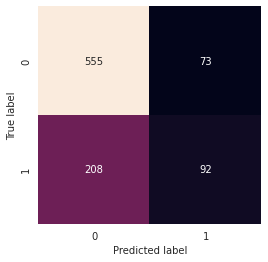

In [93]:
from sklearn.metrics import confusion_matrix, classification_report
plot_confusion_matrix(y_test, y_preds)

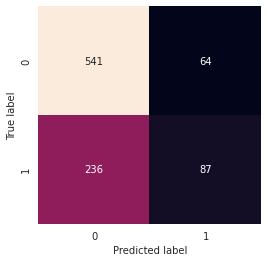

In [94]:
plot_confusion_matrix(y_missing_test, y_missing_preds)

## As per the confusion matrix we conclude that accuracy decreases after removing outliers and performing imputation.



# Conclusion: 
To conclude that the Age is the most important independent variable in deciding the future of the employee in the company. The accuracy decreases after removing outliers and performing imputation.

MIT License

 

Copyright (c) 2022 Sathwik Hegde

 

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

 

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

 

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

References:
https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e